In [49]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [50]:
paths = {
    'nifty' : "../../Datasets/",
    'vix' : "../../Datasets/VIX_2k7_2k24.csv",
    'company_3min' : "../../Datasets/Company_datasets/3min",
    'company_5min' : "../../Datasets/Company_datasets/5min",
    'company_15min' : "../../Datasets/Company_datasets/15min",
}

company_dataset_names = [ "HDFCBANK", "ICICIBANK", "INFY", "RELIANCE", "SBIN", "TCS"]
nifty_dataset_names = ["nifty_5min_data","nifty_15min_data","nifty_day_data_repopulated"]

In [68]:
datasets_5min = {}
datasets_15min = {}
datasets_3min = {}
for name in company_dataset_names:
    datasets_3min[name] = pd.read_csv((paths['company_3min'] + ('/'+name+'.csv')))
    datasets_5min[name] = pd.read_csv((paths['company_5min'] + ('/'+name+'.csv')))
    datasets_15min[name] = pd.read_csv((paths['company_15min'] + ('/'+name+'.csv')))

nifty_dataset = {}

for name in nifty_dataset_names:
    label = name.split('_')[1]
    nifty_dataset[label] = pd.read_csv((paths['nifty'] + (name+'.csv')))

vix_name = "VIX_2k7_2k24"
vix=pd.read_csv(paths['vix'])

In [52]:
nifty_dataset['15min'].head()

,date,open,high,low,close
0,2015-01-09 09:25:00,8285.45,8303.00,8285.45,8294.15
1,2015-01-09 09:40:00,8294.10,8295.75,8277.40,8285.55
2,2015-01-09 09:55:00,8285.40,8287.65,8273.95,8282.00
3,2015-01-09 10:10:00,8281.80,8287.35,8274.95,8281.55
4,2015-01-09 10:25:00,8281.50,8291.10,8277.95,8290.45


In [53]:
nifty_dataset['15min'].describe()

,open,high,low,close
count,55794.000000,55794.000000,55794.000000,55794.000000
mean,12474.731713,12486.050617,12462.310993,12474.344500
std,3931.937786,3934.569229,3929.132336,3931.934642
min,6893.300000,6914.050000,6826.350000,6892.850000
25%,9058.062500,9066.712500,9045.975000,9057.250000
50%,11126.575000,11137.875000,11111.075000,11125.400000
75%,16383.137500,16403.637500,16363.675000,16382.650000
max,22118.000000,22124.150000,22110.100000,22118.750000


In [54]:
nifty_dataset['5min'].head()

,date,open,high,low,close
0,2015-01-09 09:15:00,8285.45,8301.30,8285.45,8301.20
1,2015-01-09 09:20:00,8300.50,8303.00,8293.25,8301.00
2,2015-01-09 09:25:00,8301.65,8302.55,8286.80,8294.15
3,2015-01-09 09:30:00,8294.10,8295.75,8280.65,8288.50
4,2015-01-09 09:35:00,8289.10,8290.45,8278.00,8283.45


In [55]:
nifty_dataset['5min'].describe()

,open,high,low,close
count,167366.000000,167366.000000,167366.000000,167366.000000
mean,12474.850140,12481.212116,12468.159133,12474.722381
std,3931.979832,3933.469899,3930.421638,3931.985039
min,6873.850000,6896.300000,6826.350000,6873.700000
25%,9058.362500,9063.137500,9052.350000,9058.012500
50%,11125.850000,11132.525000,11118.925000,11125.500000
75%,16385.550000,16397.100000,16376.287500,16385.462500
max,22118.000000,22124.150000,22112.050000,22118.750000


In [56]:
nifty_dataset['day'].head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,51250.0
1,1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,56390.0
2,2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,108520.0
3,3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,93970.0
4,4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,161390.0


In [57]:
nifty_dataset['day'].describe()

,Unnamed: 0,Open,High,Low,Close,Volume
count,4096.00000,4096.000000,4096.000000,4096.000000,4096.000000,4.069000e+03
mean,2047.50000,9619.700354,9672.516114,9551.285600,9613.397525,2.609786e+05
std,1182.55768,4947.554247,4959.483279,4926.543340,4944.262971,1.727294e+05
min,0.00000,2553.600098,2585.300049,2252.750000,2524.199951,1.000000e+02
25%,1023.75000,5542.312378,5580.775146,5495.762329,5542.087524,1.519000e+05
50%,2047.50000,8328.699707,8365.149903,8271.050293,8324.475098,2.052000e+05
75%,3071.25000,11723.337158,11761.475098,11639.800048,11691.600098,2.987000e+05
max,4095.00000,23337.900391,23338.699219,23062.300781,23263.900391,1.811000e+06


In [58]:
vix.head()

,Date,Open,High,Low,Close
0,17-09-07,26.45,27.08,25.80,26.48
1,18-09-07,25.79,26.23,20.27,20.35
2,19-09-07,19.96,20.57,19.17,20.03
3,20-09-07,20.47,20.82,19.55,20.45
4,21-09-07,19.44,19.81,18.37,19.00


In [83]:
vix['Date'] = pd.to_datetime(vix['Date'], format='%d-%m-%y')
nifty_dataset['day']['Date'] = pd.to_datetime(nifty_dataset['day']['Date'])
vix.head()

,Date,Open,High,Low,Close
0,2007-09-17,26.45,27.08,25.80,26.48
1,2007-09-18,25.79,26.23,20.27,20.35
2,2007-09-19,19.96,20.57,19.17,20.03
3,2007-09-20,20.47,20.82,19.55,20.45
4,2007-09-21,19.44,19.81,18.37,19.00


In [80]:
#

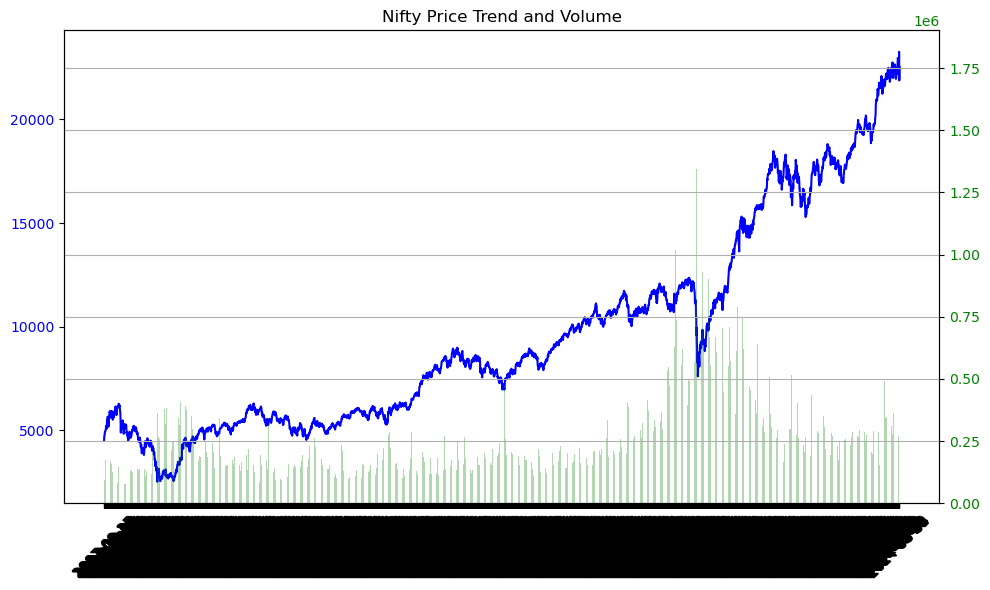

In [45]:
import matplotlib.pyplot as plt


# Creating the figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the line chart for prices
ax1.plot(nifty_dataset['day']['Date'], nifty_dataset['day']['Close'], color='blue', label='Nifty50')
# ax1.xlabel('Date')
# ax1.label('Price', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Formatting date labels
plt.xticks(rotation=45)

# Creating a secondary y-axis for the volume bar chart
ax2 = ax1.twinx()
ax2.bar(nifty_dataset['day']['Date'], nifty_dataset['day']['Volume'], alpha=0.3, color='g', width=0.4)
# ax2.yla('Volume', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Adding titles
plt.title('Nifty Price Trend and Volume')

# Displaying the chart
fig.tight_layout()
plt.grid(True)
plt.show()


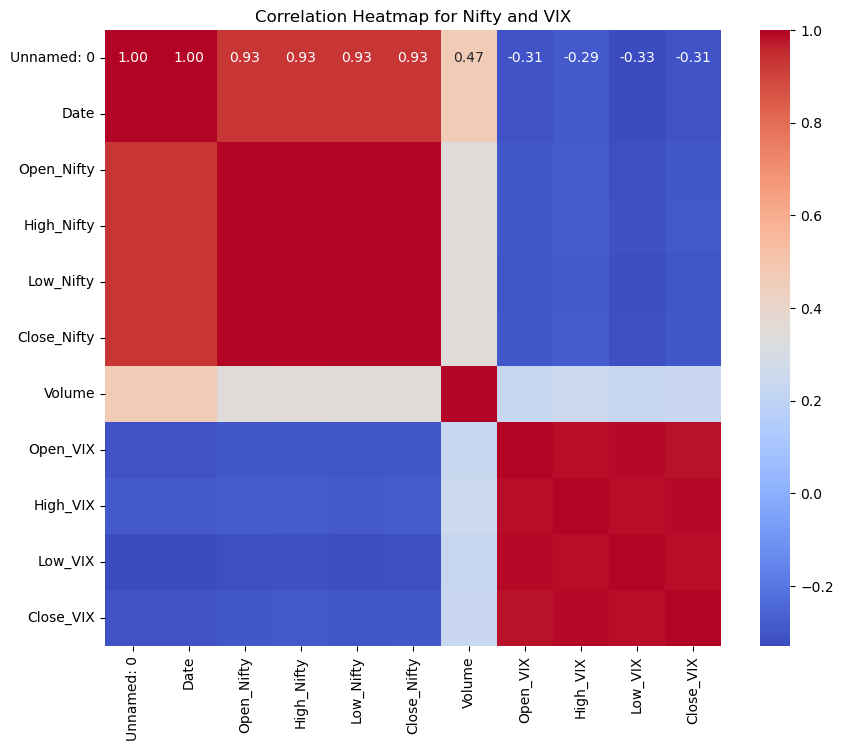

In [86]:

nifty_vix = pd.merge(nifty_dataset['day'], vix, on='Date', suffixes=('_Nifty', '_VIX'))

# Calculate the correlation matrix
corr = nifty_vix.corr()

# nifty_vix.head()
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap for Nifty and VIX')
plt.show()

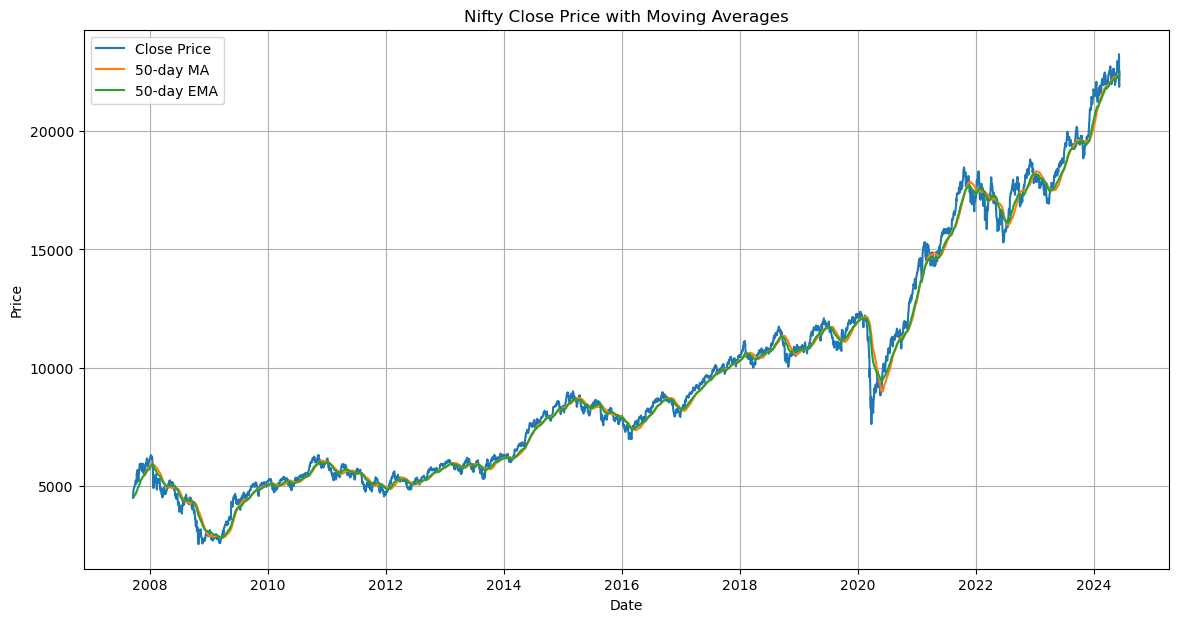

In [87]:

# Calculate 50-day Moving Average
nifty_dataset['day']['MA_50'] = nifty_dataset['day']['Close'].rolling(window=50).mean()

# Calculate 50-day Exponential Moving Average
nifty_dataset['day']['EMA_50'] = nifty_dataset['day']['Close'].ewm(span=50, adjust=False).mean()

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(nifty_dataset['day']['Date'], nifty_dataset['day']['Close'], label='Close Price')
plt.plot(nifty_dataset['day']['Date'], nifty_dataset['day']['MA_50'], label='50-day MA')
plt.plot(nifty_dataset['day']['Date'], nifty_dataset['day']['EMA_50'], label='50-day EMA')

plt.title('Nifty Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

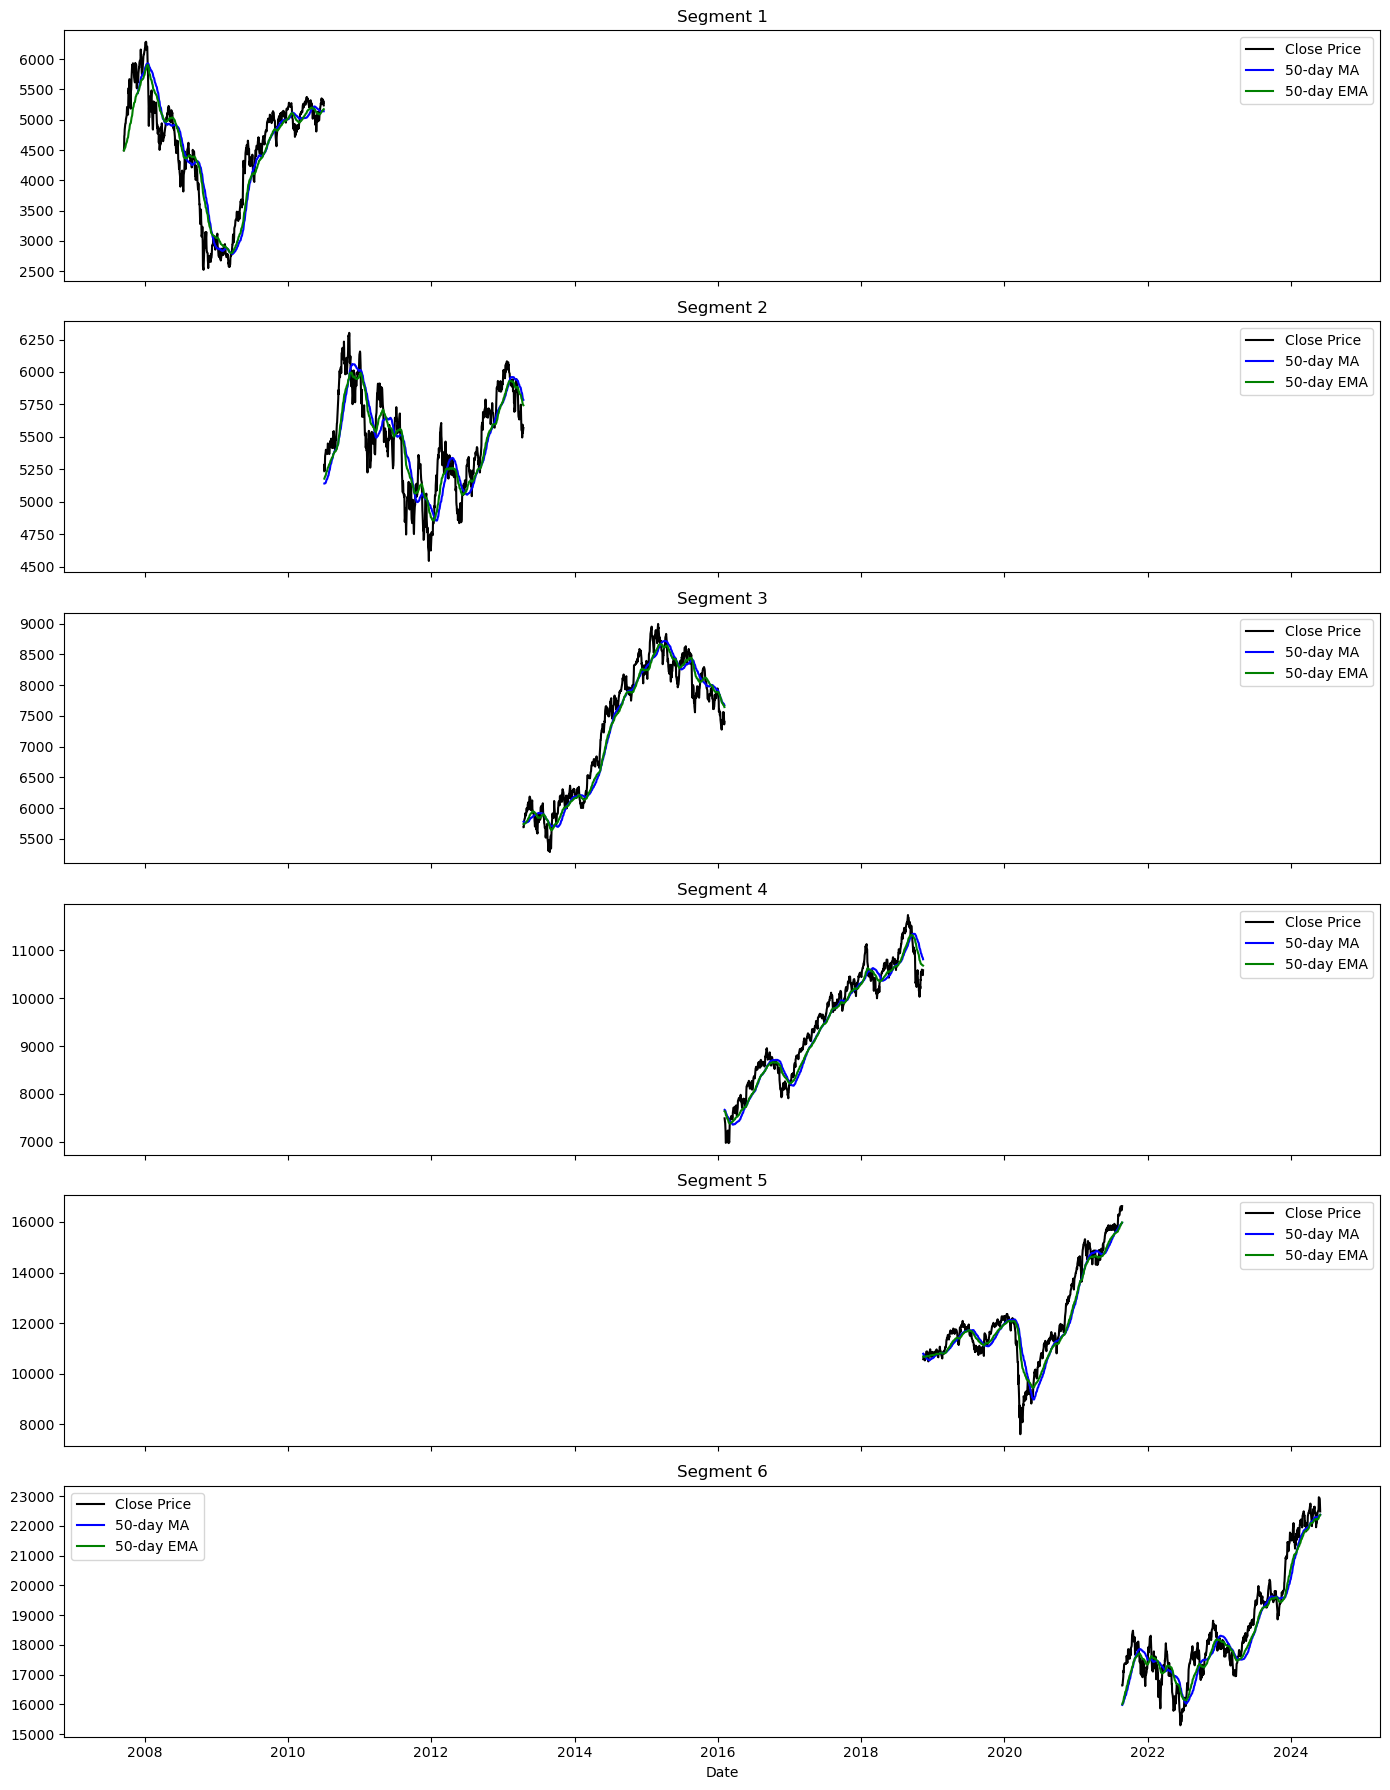

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate 50-day Moving Average
nifty_dataset['day']['MA_50'] = nifty_dataset['day']['Close'].rolling(window=50).mean()

# Calculate 50-day Exponential Moving Average
nifty_dataset['day']['EMA_50'] = nifty_dataset['day']['Close'].ewm(span=50, adjust=False).mean()

# Define the number of segments
num_segments = 6
segment_length = len(nifty_dataset['day']) // num_segments

# Plotting in 6 subplots
fig, axs = plt.subplots(num_segments, figsize=(14, 18), sharex=True)

for i in range(num_segments):
    start_idx = i * segment_length
    end_idx = (i + 1) * segment_length  # Corrected this line

    # Plot Close Price
    axs[i].plot(nifty_dataset['day']['Date'].iloc[start_idx:end_idx], nifty_dataset['day']['Close'].iloc[start_idx:end_idx], label='Close Price', color='black')
    
    # Plot 50-day Moving Average
    axs[i].plot(nifty_dataset['day']['Date'].iloc[start_idx:end_idx], nifty_dataset['day']['MA_50'].iloc[start_idx:end_idx], label='50-day MA', color='blue')
    
    # Plot 50-day Exponential Moving Average
    axs[i].plot(nifty_dataset['day']['Date'].iloc[start_idx:end_idx], nifty_dataset['day']['EMA_50'].iloc[start_idx:end_idx], label='50-day EMA', color='green')
    
    axs[i].set_title(f'Segment {i+1}')
    axs[i].legend()

# Set common labels and display
plt.xlabel('Date')
plt.tight_layout()
plt.show()
